In [4]:
# 1 Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


In [216]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [217]:
Archivo = pd.read_csv("./Titanic-Dataset.csv")

In [136]:
Archivo.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [243]:
Archivo.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,0.381757,2.313063,29.675345,0.524775,0.381757,31.126154
std,257.405474,0.486091,0.834007,13.019816,1.104186,0.806949,40.980789
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,222.750000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,445.500000,0.000000,3.000000,29.675345,0.000000,0.000000,15.047900
75%,667.250000,1.000000,3.000000,35.000000,1.000000,0.000000,32.204208
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000


Text(0.5, 1.0, 'Gráfica de valores atípicos de Fare')

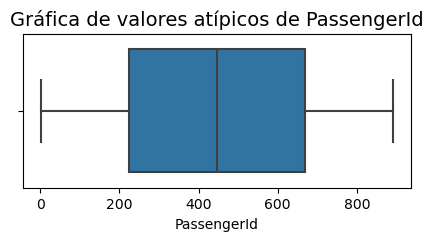

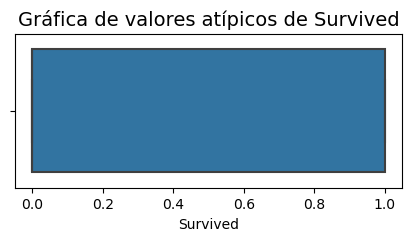

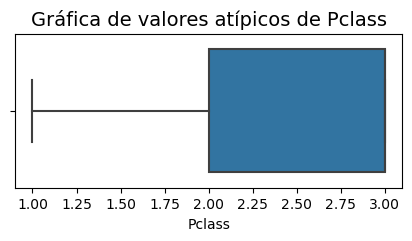

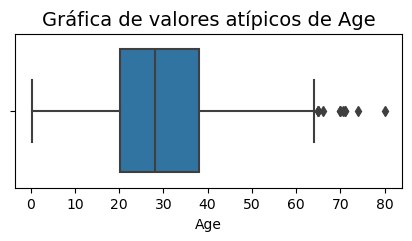

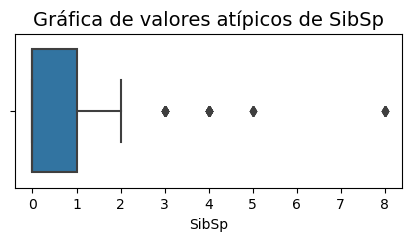

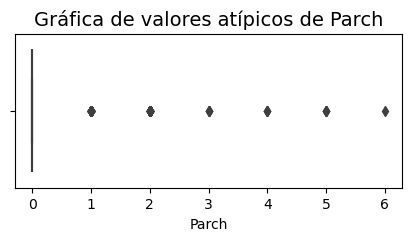

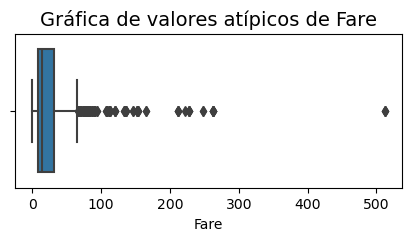

In [8]:
plt.figure(figsize=(5, 2))
sns.boxplot(x=Archivo["PassengerId"])
plt.title("Gráfica de valores atípicos de PassengerId", fontsize=14)

plt.figure(figsize=(5, 2))
sns.boxplot(x=Archivo["Survived"])
plt.title("Gráfica de valores atípicos de Survived", fontsize=14)

plt.figure(figsize=(5, 2))
sns.boxplot(x=Archivo["Pclass"])
plt.title("Gráfica de valores atípicos de Pclass", fontsize=14)

plt.figure(figsize=(5, 2))
sns.boxplot(x=Archivo["Age"])
plt.title("Gráfica de valores atípicos de Age", fontsize=14)

plt.figure(figsize=(5, 2))
sns.boxplot(x=Archivo["SibSp"])
plt.title("Gráfica de valores atípicos de SibSp", fontsize=14)

plt.figure(figsize=(5, 2))
sns.boxplot(x=Archivo["Parch"])
plt.title("Gráfica de valores atípicos de Parch", fontsize=14)

plt.figure(figsize=(5, 2))
sns.boxplot(x=Archivo["Fare"])
plt.title("Gráfica de valores atípicos de Fare", fontsize=14)

Text(0.5, 1.0, 'Relación entre Edad y Sobrevivientes')

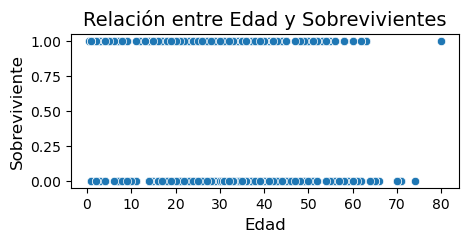

In [9]:
plt.figure(figsize=(5, 2))
sns.scatterplot(x="Age", y="Survived", data=Archivo)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Sobreviviente", fontsize=12)
plt.title("Relación entre Edad y Sobrevivientes", fontsize=14)

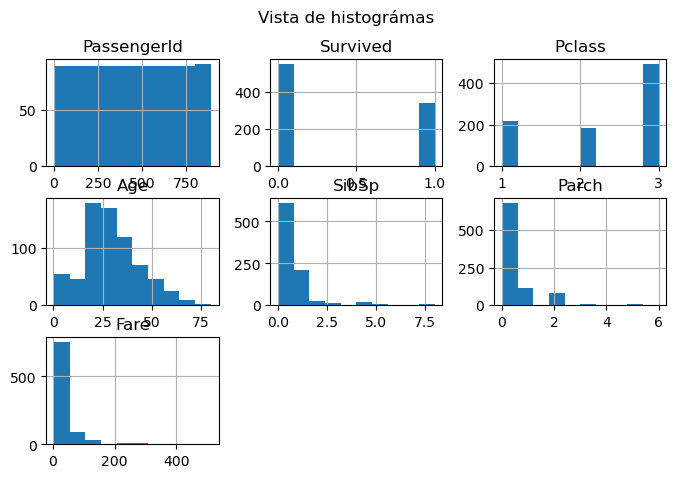

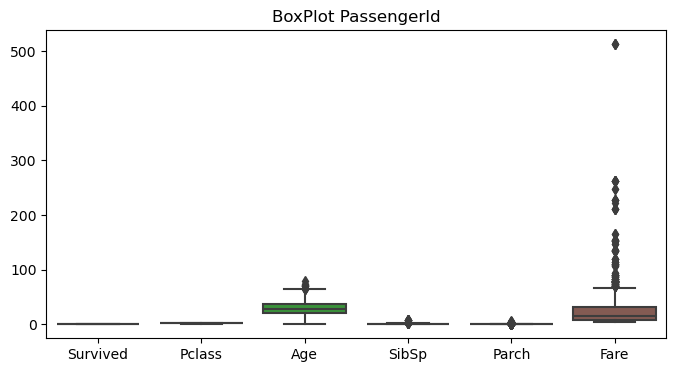

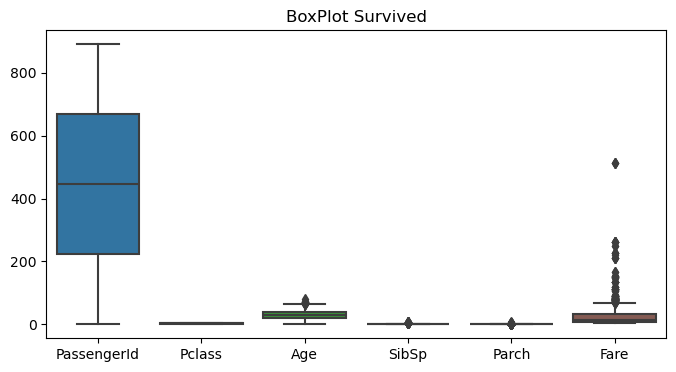

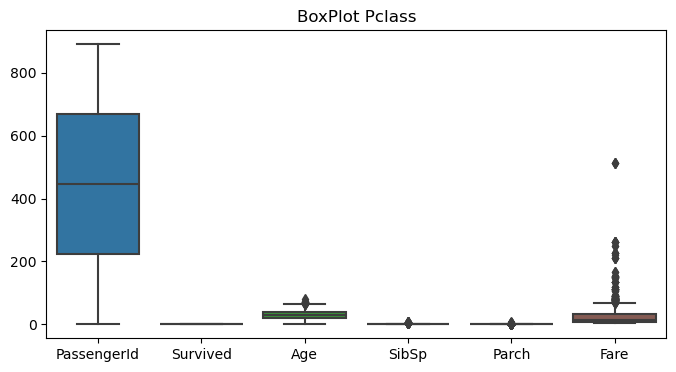

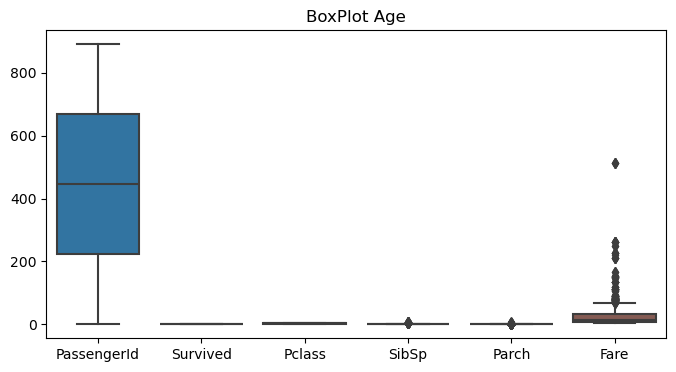

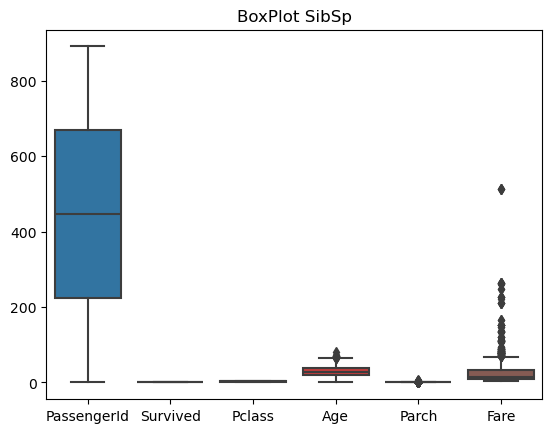

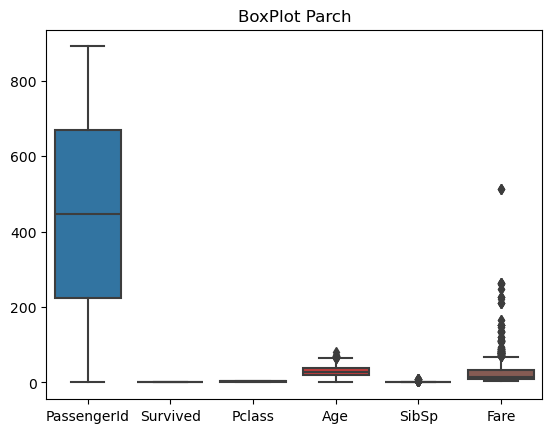

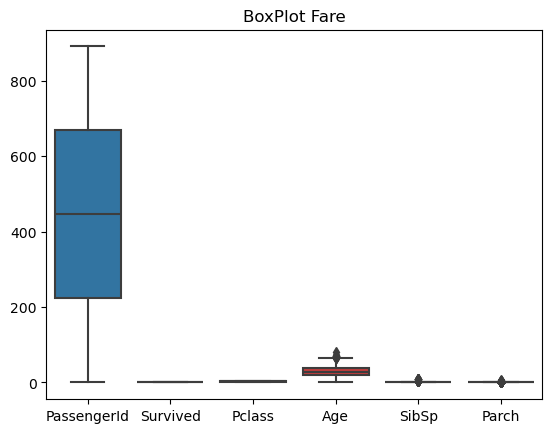

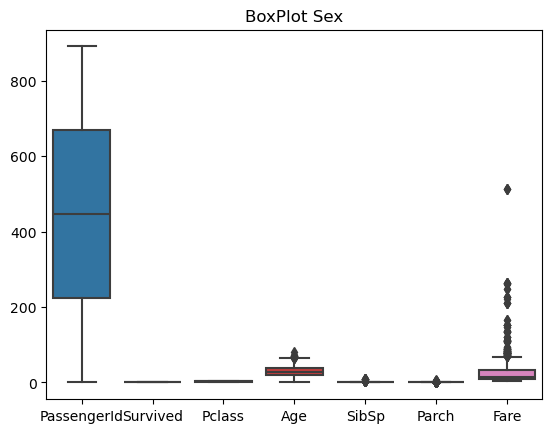

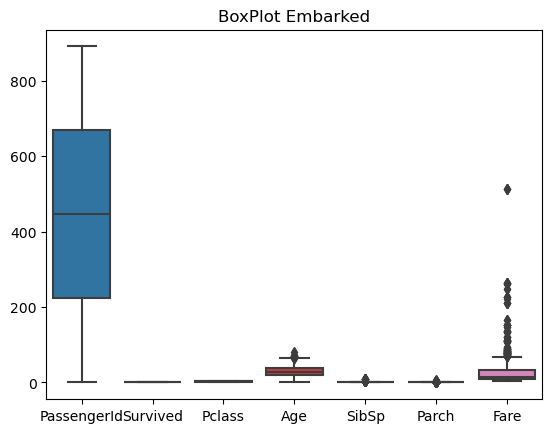

In [34]:
#Vista de histográmas y de BloxPlot
Archivo.hist(figsize=(8, 5))
plt.suptitle('Vista de histográmas')
plt.show()

#Boxplots
plt.figure(figsize=(8, 4))
sns.boxplot(data=Archivo.drop(columns=['PassengerId']))
plt.title('BoxPlot PassengerId')
plt.show()
plt.figure(figsize=(8, 4))
sns.boxplot(data=Archivo.drop(columns=['Survived']))
plt.title('BoxPlot Survived')
plt.show()
plt.figure(figsize=(8, 4))
sns.boxplot(data=Archivo.drop(columns=['Pclass']))
plt.title('BoxPlot Pclass')
plt.show()
plt.figure(figsize=(8, 4))
sns.boxplot(data=Archivo.drop(columns=['Age']))
plt.title('BoxPlot Age')
plt.show()
sns.boxplot(data=Archivo.drop(columns=['SibSp']))
plt.title('BoxPlot SibSp')
plt.show()
sns.boxplot(data=Archivo.drop(columns=['Parch']))
plt.title('BoxPlot Parch')
plt.show()
sns.boxplot(data=Archivo.drop(columns=['Fare']))
plt.title('BoxPlot Fare')
plt.show()
sns.boxplot(data=Archivo.drop(columns=['Sex']))
plt.title('BoxPlot Sex')
plt.show()
sns.boxplot(data=Archivo.drop(columns=['Embarked']))
plt.title('BoxPlot Embarked')
plt.show()

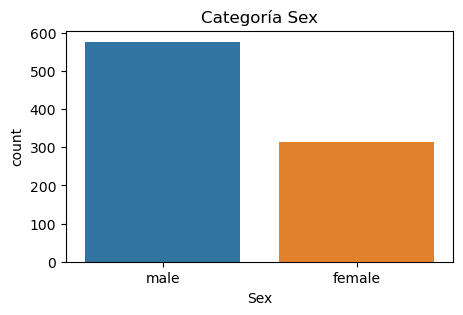

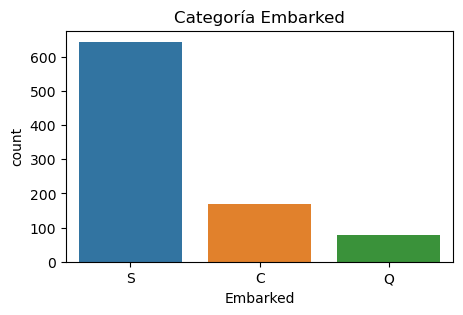

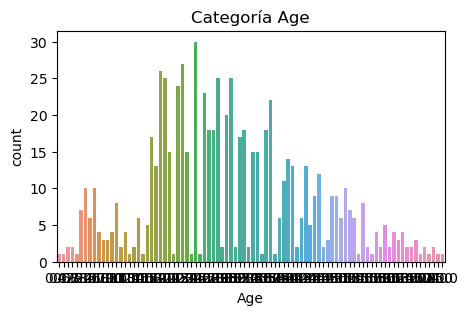

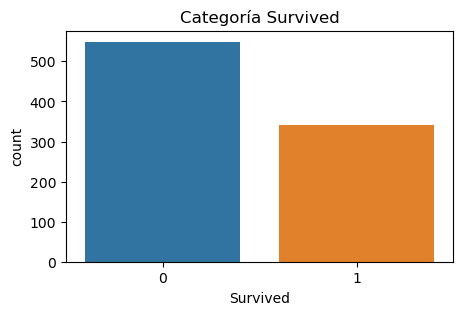

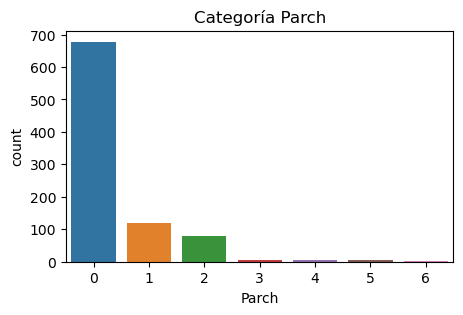

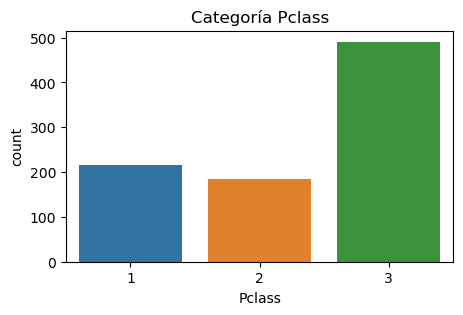

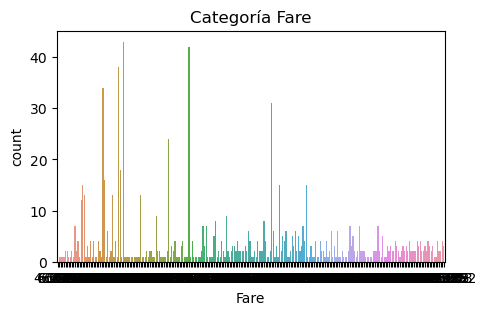

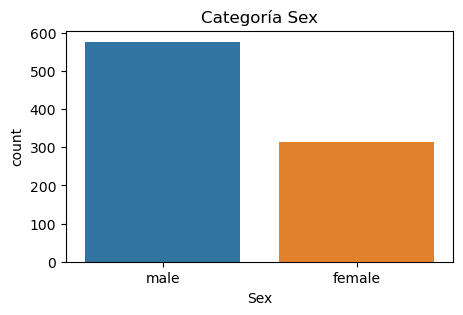

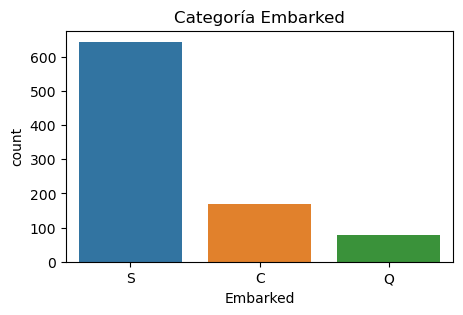

In [33]:
#Visualización variables por categoría
plt.figure(figsize=(5, 3))
sns.countplot(data=Archivo, x='Age')
plt.title('Categoría Age')
plt.show()
plt.figure(figsize=(5, 3))
sns.countplot(data=Archivo, x='Survived')
plt.title('Categoría Survived')
plt.show()
plt.figure(figsize=(5, 3))
sns.countplot(data=Archivo, x='Parch')
plt.title('Categoría Parch')
plt.show()
plt.figure(figsize=(5, 3))
sns.countplot(data=Archivo, x='Pclass')
plt.title('Categoría Pclass')
plt.show()
plt.figure(figsize=(5, 3))
sns.countplot(data=Archivo, x='Fare')
plt.title('Categoría Fare')
plt.show()
plt.figure(figsize=(5, 3))
sns.countplot(data=Archivo, x='Sex')
plt.title('Categoría Sex')
plt.show()
plt.figure(figsize=(5, 3))
sns.countplot(data=Archivo, x='Embarked')
plt.title('Categoría Embarked')
plt.show()

In [25]:
# 2 Procesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [219]:
print("Registros con valor 0 en Fare:", (Archivo["Fare"] == 0).sum()) 
#Consulta de valor de Fare (Valor del boleto) con 15 registros en 0

Registros con valor 0 en Fare: 15


In [220]:
print("Registros con valor 0 en Pclass:", (Archivo["Pclass"] == 0).sum()) 
#Consulta de valor de Pclass con 0 registros en 0

Registros con valor 0 en Pclass: 0


In [221]:
Archivo["Fare"]=Archivo["Fare"].replace(0,Archivo["Fare"].mean())
#Reemplazo de valores en 0 por la media 

In [222]:
conteo_minimo=1
conteo_maximo=300
Total_atipicos=((Archivo["Fare"]<conteo_minimo)|(Archivo["Fare"]>conteo_maximo)).sum()
print ("La cantidad de datos atípicos corresponde a {}".format(Total_atipicos))

La cantidad de datos atípicos corresponde a 3


In [239]:
media_edad = Archivo['Age'].mean()
Archivo['Age'] = Archivo['Age'].fillna(media_edad)

In [225]:
Archivo=Archivo[(Archivo["Fare"]<conteo_maximo)&(Archivo["Fare"]>conteo_minimo)]

In [226]:
#Eliminamos los datos atípicos que son 3 y volvemos a realizar la consulta
conteo_minimo=1
conteo_maximo=300
Total_atipicos=((Archivo["Fare"]<conteo_minimo)|(Archivo["Fare"]>conteo_maximo)).sum()
print ("La cantidad de datos atípicos corresponde a {}".format(Total_atipicos))

La cantidad de datos atípicos corresponde a 0


In [259]:
Archivo.info(10)

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Name         888 non-null    object 
 4   Sex          888 non-null    object 
 5   Age          888 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        888 non-null    int64  
 8   Ticket       888 non-null    object 
 9   Fare         888 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     886 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.2+ KB


In [46]:
# Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [260]:
conteo_sobrevivientes = Archivo["Survived"].value_counts()
print(conteo_sobrevivientes)

Survived
0    549
1    339
Name: count, dtype: int64


In [261]:
Archivo[["Survived"]].head(10)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [61]:
# 4 Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [251]:
x = Archivo[['Survived']]
y = Archivo["Survived"]

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

In [252]:
print (x_train)

     Survived
671         0
488         0
634         0
21          1
418         0
..        ...
131         0
490         0
528         0
48          0
80          0

[666 rows x 1 columns]


In [245]:
print (y_train)

671    0
488    0
634    0
21     1
418    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 666, dtype: int64


In [151]:
#5 Entrenar el modelo configurando los diferentes hiperparámetros.


In [253]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (x_train, y_train)
prediction = modelo_regresion.predict(x_test)

In [254]:
print (prediction)

[0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1
 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1
 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0
 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0]


In [101]:
#6 Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.


In [255]:
print (classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00        85

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222



In [178]:
#7 Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.


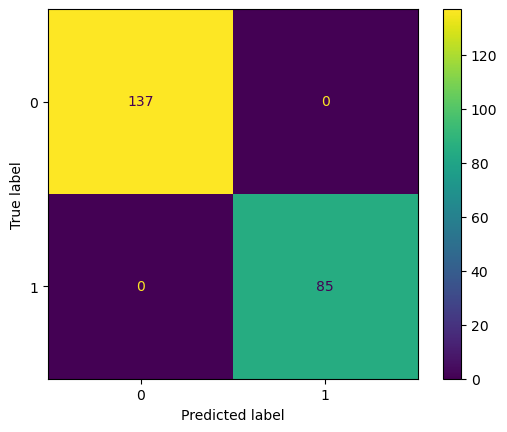

In [258]:
cm=confusion_matrix(y_test, prediction)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

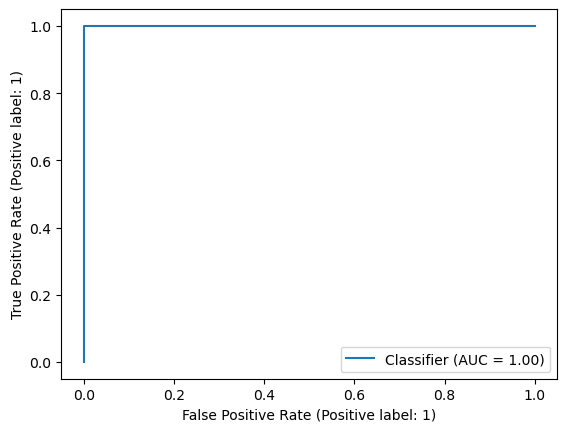

In [257]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, prediction)
plt.show()

In [194]:
# *En la matriz de confusión podemos interpretar que:
    # de 137 personas que se predijo sobrevivirian, ninguna de ellas sobrevivió
    # de 85 personas que se predijo que Sobrevivirian, todas si sobrevivieron
    # La misma dimensión de la matríz de confusión se evidencia con la curva de predicción, aunque al ser solo datos binarios no se evidencia una curva como tal
    